begin October 18 2020
# Graph Data Structure

<b>Graph</b> data structure is used to represent relationships and networks. E.g. metabolic pathways, transportation networks, social netowrks, circuits etc. [Also, I've been coding neural networks which is essentially a graph] 
A graph is connection of <b>vertices(nodes)</b> and <b>edges </b> that connect them. Edges can be weighted.

#### Types of Graph 
<img src ='graph_types.png' width='400' height='400' >
  

<b> Degree of a vertex V</b> is the number of vertices adjacent to the V. A vertex U is adjacent to V when the edge from U incidence on V. <b> Indegree</b> is the number of incoming edges to V, while the <b> outdegree </b> is the number of outgoing edges from V.
For a directed graph the <b> indegree </b> ==  <b>outdgree</b>
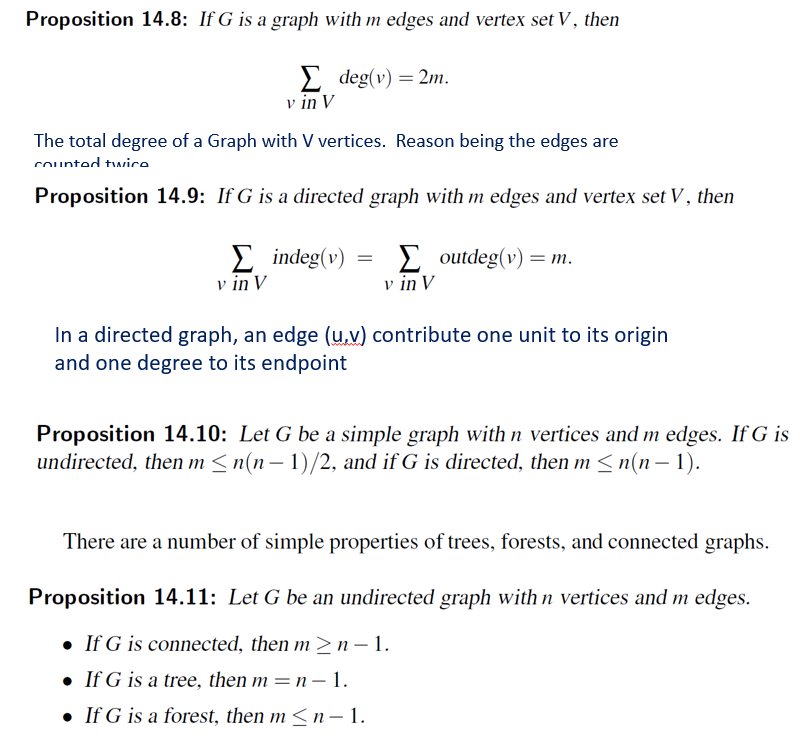    



# Graph Abstraction

Recall that a graph is a collection of:
- Vertices
- edges
- graphs (subgraphs precisely)

Therefore, the following properties and functionalities of each componennt of graph must be encoded:

#### 1. Vertex
 An object that stores data element provided by the user, e.g.  airport code. 

- <b>element()</b> : method to retrieve stored element

#### 2. Edge
Edge object stores an associated object (flight number, travel distance or cost) that is retrieved with the element() method.
An Edge needs to support the following tasks 1) retrieve a vertex element, 2) return endpoints 3) return the opposite endpoint if the other endpoint is given. 

- <b>endpoint()</b>: returns tuple (u,v) such that <i> u</i> is the origin and <i> v</i> is the destination. (for an undirected graph direction is arbitrary)
- <b>opposite(v)<b>: given an edge and its endpoint v, returns the other endpoint 

#### Graph ADT
The main abstraction of the graph. Whether a graph is <i> undirected</i> or <i> directed</i> is declared upon contruction of the Graph class. Graph ADT supports the following methods:

- <b>vertex_count()</b>: returns number of vertices
- <b>vertices()</b>: returns an iteration (list etc) of all vertices
- <b>edge_count()</b>: returns number of edges
- <b>edges()</b>: return an iteration of all edges
- <b>get_edge(u,v)</b>: returns the edge from u to v; otherwise None
- <b>degree(v, out=True)</b> : For an undirected graph, returns the number of edges incident to v. For directed graph, returns the number of outgoing edges (out=True) incident to vertex v.
- <b>incident_edges(v, out=True)</b>: returns an iteration of all edges that are incident on vertex v. out=True reports outgoing edges.
- <b> insert_vertex(data=None)</b>: create and return a new Vertex storing element data.
- <b>insert_edge(u,v,data=None) </b>: Create a new edge between existing vertices u and v. Edge may store data (weight)
- <b> remove_vertex(v) </b>: deletes vertex v and all its incident edges
- <b>remove_edge(e)</b>: deletes edge e from graph

# Data Structures for Graph Representation
<b>
- Adjacency list
- Adjacent matrix
- edge list
- adjacent map
    </b>

These data structures vary based on how they organise the edges that connect the vertices. Each has its pros and cons.

- <b> edge_list: </b> an unordered list of all edges. But cannot locate specific edge (u,v).
- <b> Adjacency list: </b>: dictionary keyed by vertex v with a list of its adjacent/incidental vertices. 
    ```python 
    adj_list= { A: [B,E,D],
                B: [A,C] }
   ```
- <b> Adjacency map</b>: similar to a adj. list but the all incident edges is organised as a map (dictionary) rather than as a list, with the adjacent vertex serving a key (unfamiliar to me). Allows O(1) for accessing a specific edge (u,v). <font color='red'> <i> essentially using a nested dictionary to abstract Graph </i></font>
- <b> Adjacency matrix : </b> and nxn matrix of n vertices. Worst-case O(1) access to a specific edge (u,v). Each cell in he nxn matrix is an edge. nxn can be one-hot encoded such tha value is None for no connection, and 1 is a connection. Alternatively, the value of the cell can represent the weight of the edge


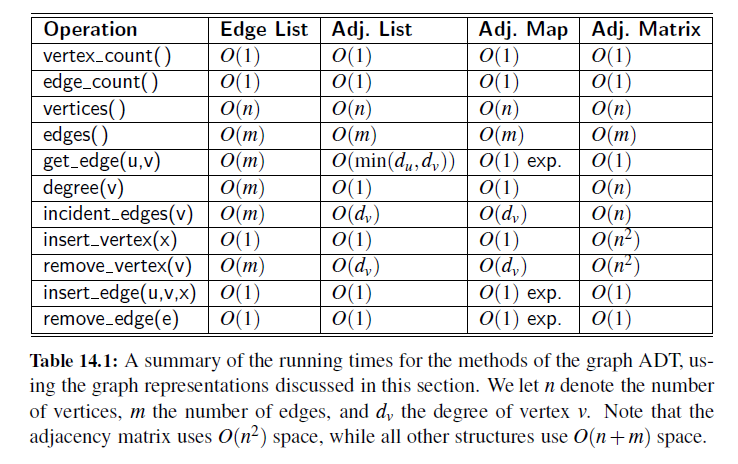


## Python Implementation of Graph

In [17]:
a =[1,2,4,5,]
def func(a):
    for i in a:
        yield i

In [ ]:
class Graph:
    ## nested  Vertex class
    class Vertex:
        def __init__(self, x):
            self._element = x
        def element(self):
            "return element of this vertex"
            return self._element
        def __hash__(self):
            "hash+id makes vertex unique so it can be map/set key"
            return hash(id(self))

    #nested Edge class
    class Edge:
        def __init__(self,u,v,x):
            "every edge has two endpoints, and associated info"
            self._origin = u
            self._destination = v
            self._element = x #want to remain weight not confuse with Vertex._element attr

        def endpoints(self):
            " Return tuple (u,v)"
            return (self._origin, self._destination)

        def opposite(self, v):
            "return the other endpoint of this edge given v"
            if not isinstance(v, Graph.Vertex):
                raise TypeError ('v must be a Vertex')
            return self._origin if v is self._destination else self._destination
            raise ValueError ('v not incident to edge')

        def element(self):
            """return element associated with this edge"""
            return self._element

        def __hash__(self):
            """allows an edge to be a map/set key"""
            return hash(self._origin, self._desitination)
        def __str__(self):
            return '{0},{1},{2}'.format(self._origin, self._destination, self._element)

    #### Main Graph Representation using adjaceny map
    
    def __init__(self, directed=False):
        """create an empty graph (undirected by default)"""
        self._outgoing = {} #dictionary to map vertex to its neighbours
        #only create separate map for directed; use alias for undirected
        self._incoming = {} if directed else self._outgoing
        
    def is_directed(self):
        """ Return True if a directed Graph"""
        return self._incoming is not self._outgoing
    
    def vertex_count(self):
        "returns number of vertices in graph"
        return len(self._outgoing)
    
    def vertices(self):
        return self._outgoing.keys()
    def edge_count(self):
        """ return number of edges in graph"""
        total = sum( len(self._outgoing[v] for v in self._outgoing) )
        #ensure not to double count for an undirected graph
        if not self.is_directed():
            total= total /2
        return total 
    
    def edges(self):
        "return set of all edges in the graph"
        result = set() #avoid redundnat edges for undirected graphs
        
        for secondary_map in self._outgoing.values():
            #recall that each edge is an inner dict instead of list
            result.update(secondary_map.values()) # set.update() adds items from an iterable to the set
        return result
        
    def get_edge(self, u,v):
        return self._outgoing[u].get(v) #returns None if v not adjacent
    
    def degree(self, v, outgoing=True):
        """return number of outgoing edges incident to vertex v"""
        adj_vertices = self._outgoing if outgoing else self._incoming
        return len(adj_vertices)
    
    def incident_edges(self, v, outgoing=True):
        "returns all outgoing edges incident to vertex in the graph"
        adj = self._outgoing if outgoing else self._incoming
        for edge in adj[v].values():
            yield edge
    
    def insert_vertex(self, x=None):
        """Insert and return a new Vertex with element x"""
        v = self.Vertex(x)
        self._outgoing[v]={}
        if self.is_directed():
            self._incoming[v]={} #need distinct map for incoming edges
        return v
    
    def insert_edge(self, u, v, x=None):
        """insert and return Edge from u to v with auxillary element x"""
        e = self.Edge(u,v,x)
        self._outgoing[u][v] = e #direction of edge
        self._incoming[v][u] = e

##### id()
- The id() function returns identity (unique integer) of an object.
- This identity an integer that is unique for the given object and remains constant during its lifetime.
- 
##### Properties of hash()
-  hash() method to encode the data into unrecognisable value
- Objects hashed using hash() are irreversible, leading to loss of information.
- hash() returns hashed value only for immutable objects, hence can be used as an indicator to check for mutable/immutable objects

In [5]:
print(hash(20))
print(hash('20'))
tup = ('a','b')
lst = ['a','b']
print(hash(tup))
print(hash(lst)) #lists are mutable so error

20
-6143065105639873988
2899361269648789519


TypeError: unhashable type: 'list'